# Gas Discharge & Stellar Feedback-driven Outflows (Part 1 /2):
## General Observations
`-- Leo Lonzarich, 20 October 2021 // [Updated 15-11-21] --`


### Table of Contents
- [Analysing Discharged Gas](#compare)
    - [Comparing Radial Positions](#radialpositions)
    - [Comparing Radial Velocities](#velocities)
    - [Comparing Exit Angles](#ejectedexit)
    - [Comparing Temperatures](#comptemperature)
- [The Proving Grounds](#proving)


### General Comments on the Contents of this Noteboook
- Repeated pids that turn up in the data sets below (e.g. 'ejected,' 'expelled,' 'discharged') should mean that the same particle has been accreted and reejected more than once --- hence its reoccurance in the set.


- While each root data set is defined where used, definitions are included here for convenience:
    - *Ejected*: All gas partiles that have been removed from their respective satellite galaxy's disk and into the halo.
    - *Expelled*: All gas particles (either within the disk or halo of their respective satellite galaxy) that have been removed beyond the virial radius of their satellite; that is, all gas that has been completely removed from its respective satellite.
    - *Discharged*: All gas that has been removed from the disk of its respective satellite galaxy. This includes gas both moved to the halo and beyond the virial radius.
    - *predischarged*: This is essentially a data set containing the pre-properties of the discharged gas, that is, it contains all of those gas particles in the *discharged* set but with their properties before being discharged.
    - *dsrg_accreted*: **fill in**
    
    
- Units for key values used in this notebook:
    - *Time* is in Gigayears $(Gyrs)$.
    - *Distances* in kiloparsecs $(kpc)$.
    - *Velocities* in kiloparsecs per year $(kpc \ yr^{-1})$.
    - *Masses* in Solar masses $(Msol)$.

In [13]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# from analysis import * 
from analysis_mac import *
mpl.rcParams.update(mpl.rcParamsDefault)

In [22]:
path = '/home/lonzaric/astro_research/Stellar_Feedback_Code/SNeData/discharged_particles.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])

# listing dwarf galaxies of simulations that are viable for study (gaseous, satellite, etc).
print(len(keys), 'Available Keys:', *keys)

19 Available Keys: h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33


## The 'Discharged' Gas: Comparing Heated Vs. All <a class="anchor" id="compare"></a>

____
____

We are here concerned only with particles that leave the disk of a satellite galaxy; whether they are removed to the satellite halo or beyond matters not. To avoid confusion with the prior terminology of this notebook, we coin 'discharged' to specify the subset of gas that is removed from satellite's disks. Further, unless otherwise noted, reference 'ejection' will mean only its explicit, denotative meaning.

### Comparing Radial Positions <a class="anchor" id="radialpositions"></a>

For this treatment, we look specifically at radial positions for 1) gas that has been 'discharged' from select satellite galaxy's disks, 2) the subset of 'discharged gas that was SNe-heated (abreviated by 'heated'), and 3) 'pre-discharged' gas --- that is, the 'discharged' gas in the timestep before it is ejected.


In [2]:
#ejected, cooled, expelled, accreted = read_all_ejected_expelled()
predischarged, discharged, accreted, preheated, heated = read_discharged()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (predischarged, discharged, accreted, preheated, heated) for all available satellites <


In [3]:
# Ids of predischarged.
x = np.array(predischarged['pid'])
# Ids of SNe-heated discharged gas.
y = np.array(heated['pid'])

# sampling all particles from 'predischarged' with pids matching 'heated' pids; picking heated gas pre discharge.
index = np.argsort(x)
sorted_x = x[index] # Sorted list of ids pre discharged                        
sorted_index = np.searchsorted(sorted_x, y)
yindex = np.take(index, sorted_index, mode="clip")
mask = x[yindex] != y
result = np.ma.array(yindex, mask=mask)
hot_predischarged = predischarged.iloc[result[~result.mask].data] # Array of all iords   

In [5]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

hot_predischarged['weight'] = hot_predischarged['mass'] / hot_predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

In [6]:
# consolidating cartesian position & velocity components for every gas particle relative to its respective satellite.
predischarged_pos = np.array([predischarged.x, predischarged.y, predischarged.z]).T
predischarged_vel = np.array([predischarged.vx, predischarged.vy, predischarged.vz]).T

# for gas that was SNe-heated.
hot_predischarged_pos = np.array([hot_predischarged.x, hot_predischarged.y, hot_predischarged.z]).T
hot_predischarged_vel = np.array([hot_predischarged.vx, hot_predischarged.vy, hot_predischarged.vz]).T

# for gas after being discharged from its satellite.
discharged_pos = np.array([discharged.x, discharged.y, discharged.z]).T
discharged_vel = np.array([discharged.vx, discharged.vy, discharged.vz]).T

# repeating the above for SNe-heated gas in particular.
hot_pos = np.array([heated.x, heated.y, heated.z]).T
hot_vel = np.array([heated.vx, heated.vy, heated.vz]).T

# for discharged gas after being accreted back onto its satellite.
accreted_pos = np.array([accreted.x, accreted.y, accreted.z]).T
accreted_vel = np.array([accreted.vx, accreted.vy, accreted.vz]).T


# calculating radial positions of hot/all discharged gas.
pre_radpos = np.sqrt(np.sum(predischarged_pos**2, axis=1))
hot_pre_radpos = np.sqrt(np.sum(hot_predischarged_pos**2, axis=1))
all_radpos = np.sqrt(np.sum(discharged_pos**2, axis=1))
hot_radpos = np.sqrt(np.sum(hot_pos**2, axis=1))
accreted_radpos = np.sqrt(np.sum(accreted_pos**2, axis=1))

# computing radial velocities for hot/all discharged gas particles.
pre_radvel = np.sum(predischarged_pos * predischarged_vel, axis=1) / np.sqrt(np.sum(predischarged_pos**2, axis=1))
hot_pre_radvel = np.sum(hot_predischarged_pos * hot_predischarged_vel, axis=1) / np.sqrt(np.sum(hot_predischarged_pos**2, axis=1))
all_radvel = np.sum(discharged_pos * discharged_vel, axis=1) / np.sqrt(np.sum(discharged_pos**2, axis=1))
hot_radvel = np.sum(hot_pos * hot_vel, axis=1) / np.sqrt(np.sum(hot_pos**2, axis=1))

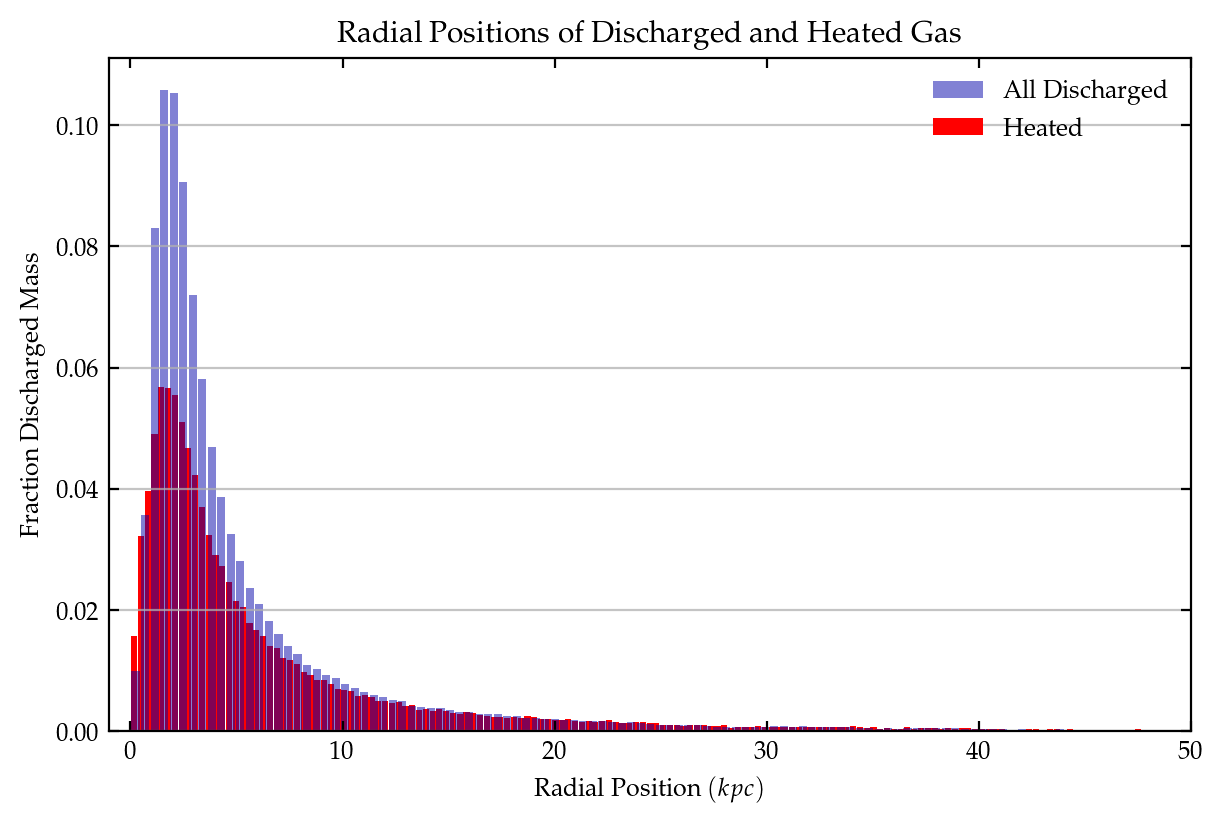

In [7]:
# Position histograms for all gas, and heated gas.
bins = 300

plt.figure()
plt.hist(all_radpos, bins=bins, weights=discharged.weight, color='#0504aa', alpha=0.5, rwidth=0.85,\
         label='All Discharged', zorder=-1)

plt.hist(hot_radpos, bins=bins+50, weights=heated.weight, color='red', alpha=1, rwidth=0.90,\
         label='Heated', zorder=-1000)


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Radial Position $(kpc)$')
plt.ylabel('Fraction Discharged Mass')
plt.title('Radial Positions of Discharged and Heated Gas')

# leg1 = plt.legend(title='Gas', loc='upper left')
# leg1._legend_box.align = 'right'
# legend(loc=(0.26,0.74))

plt.xlim(-1,50)
#plt.ylim(0,0.085)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)

plt.legend(loc='upper right')
plt.show()

# clean upper 1-axis limit:
#maxfreq= n.max()
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


# bins = 40

# plt.hist(ejected_pos_norm, bins=bins, alpha=0.7, weights=ejected.weight.T, histtype='bar', ec='black')
# plt.hist(hot_pos_norm, bins=bins, alpha=1, weights=hot_weight, histtype='bar', ec='black')


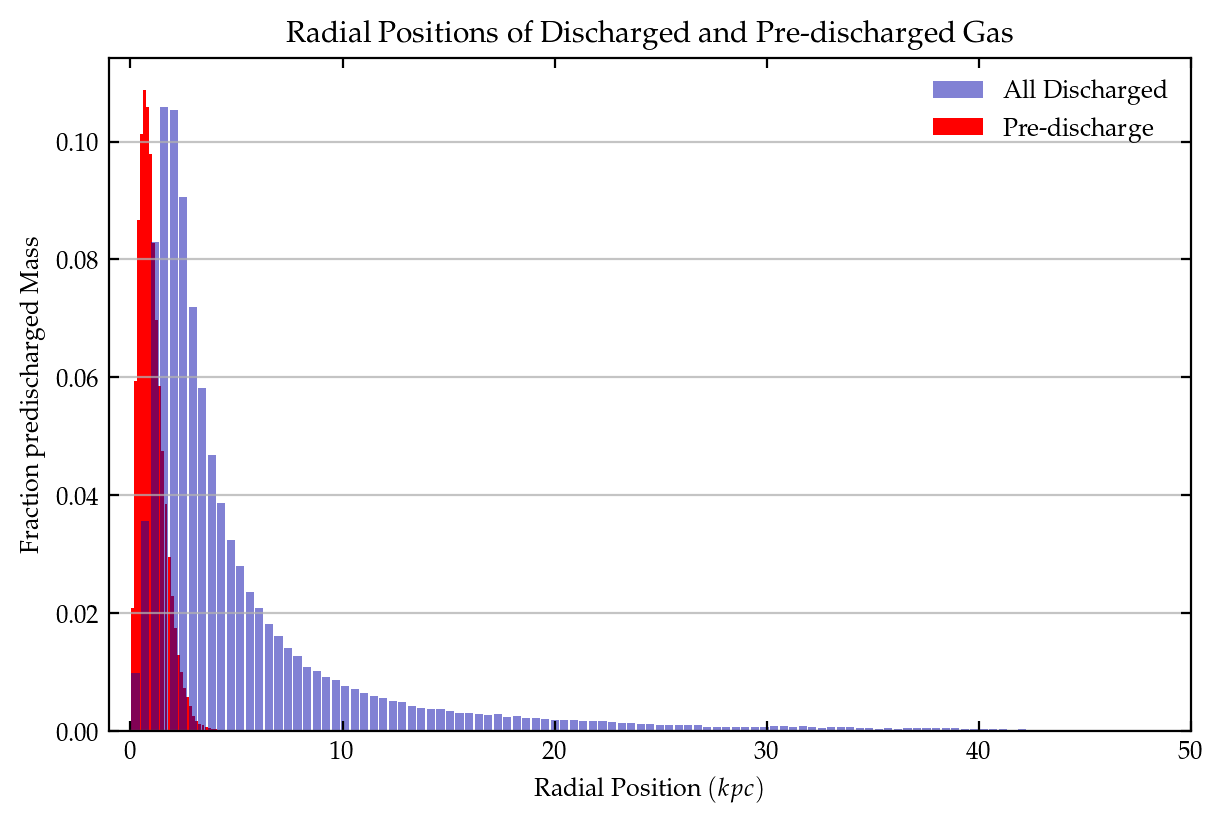

In [8]:
# Position  histograms for all gas, and heated gas.
bins = 300

plt.figure()
plt.hist(all_radpos, bins=bins, weights=discharged.weight, color='#0504aa', alpha=0.5, rwidth=0.85,\
         label='All Discharged', zorder=-1)
plt.hist(pre_radpos, bins=bins-200, weights=predischarged.weight, color='red', alpha=1, rwidth=0.95,\
         label='Pre-discharge', zorder=-1000)


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Radial Position $(kpc)$')
plt.ylabel('Fraction predischarged Mass')
plt.title('Radial Positions of Discharged and Pre-discharged Gas')

# leg1 = plt.legend(title='Gas', loc='upper left')
# leg1._legend_box.align = 'right'
# legend(loc=(0.26,0.74))

plt.xlim(-1,50)
#plt.ylim(0,0.085)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)

plt.legend(loc='upper right')
plt.show()

# clean upper 1-axis limit:
#maxfreq= n.max()
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


# bins = 40

# plt.hist(ejected_pos_norm, bins=bins, alpha=0.7, weights=ejected.weight.T, histtype='bar', ec='black')
# plt.hist(hot_pos_norm, bins=bins, alpha=1, weights=hot_weight, histtype='bar', ec='black')


We plot the histograms as cleaner line plots below to better-observe the trends in positions for the different sets of data.

Further, in these plots, we also include a horizontal dashed line representing the radial position of the 'radial center of mass,' or 'COM,' for each data set.

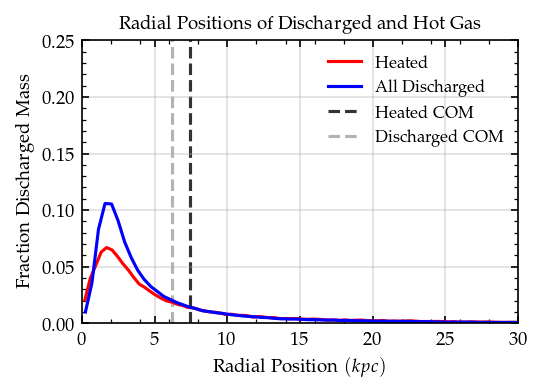

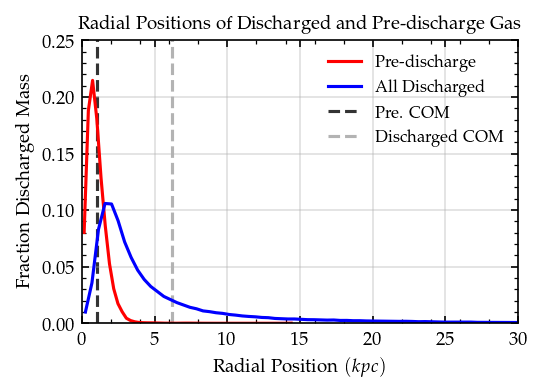

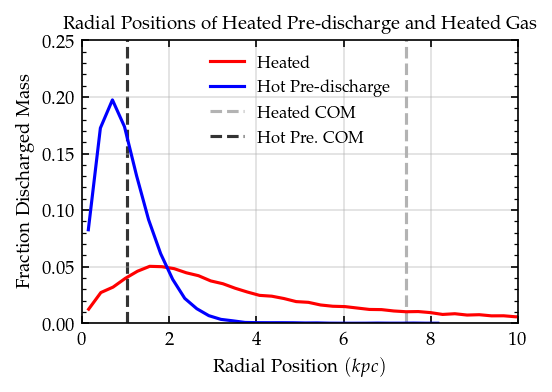

In [8]:
##### plotting discharged vs. heated gas #####
bins = 300
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radpos, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_radpos, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')

com1 = hot_radpos.mean()
com2 = all_radpos.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Position $(kpc)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(0,30)
ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# ticks = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y*1))
# ax.yaxis.set_major_formatter(ticks)

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_radpos, bins=50, weights=predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radpos, bins=300, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')

com1 = pre_radpos.mean()
com2 = all_radpos.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Radial Position $(kpc)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(0,30)
ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radpos, bins=400, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(hot_pre_radpos, bins=30, weights=hot_predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# plot mean position of mass.
com1 = hot_radpos.mean()
com2 = hot_pre_radpos.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Hot Pre. COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Radial Position $(kpc)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(0,10)
ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

In [10]:
# finding mean positions of mass.
pre_com = pre_radpos.mean()
hot_pre_com = hot_pre_radpos.mean()
all_com = all_radpos.mean()
hot_com = hot_radpos.mean()

# computing difference in COMs for the above three graphs in order.
print(all_com-hot_com), print(all_com-pre_com), print(hot_com-hot_pre_com);

-1.2044551539314234
5.193728213349389
6.393020256511232


In these above three plots, it is easy to mistake the that the distributions of the different gas selections are nearly identical since all appear to peak near 0 kpc. However, when we also plot indicators locating the averaged radial position (which is here termed the 'radial center of mass' or COM because we analyse a percentage distribution of mass), it becomes clear that there are noteworthy differences in how far each chosen set of gas is from the satellite centers.

In the cases above, it turns out that the radial centers of mass differ as follows:

- The total of discharged gas is ejected $\sim 11.34 \ kpc$ farther than SNe-discharged gas on its own;

- The total of discharged gas is ejected $\sim 14.07 \ kpc$ out from its original location in the satellite disks;

- The SNe-discharged gas moves $\sim 3.06 \ kpc$ out from its original position in the satellite disks (which is not far --- likely just beyond the edge of the disk into the halo).



### Comparing Radial Velocities <a class="anchor" id="velocities"></a>

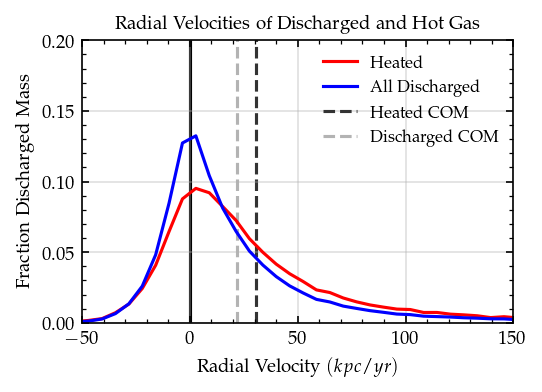

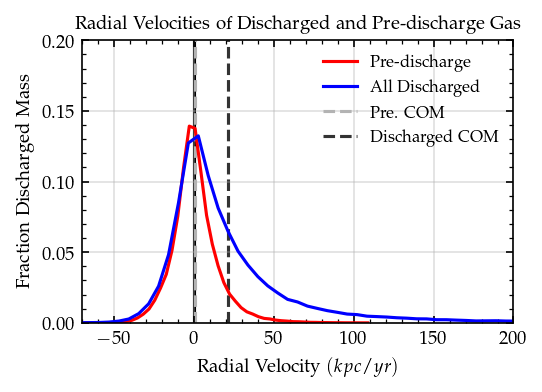

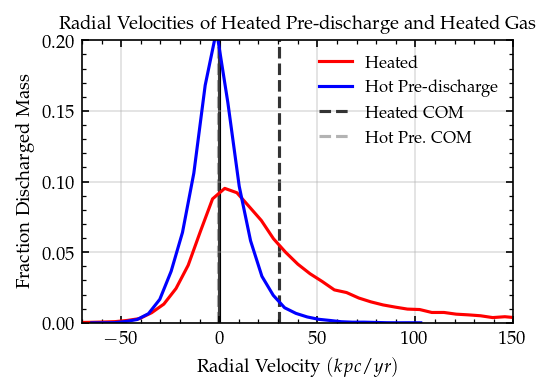

In [17]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_radvel, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-50,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_radvel, bins=50, weights=predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radvel, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = pre_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-10000)

# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,200)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(hot_pre_radvel, bins=30, weights=hot_predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = hot_pre_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Hot Pre. COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

The radial centers of mass are again included to better detail the velocity at which the bulk of each gas group is traveling.

All particles are moving out/into the the center of the satellites nearly uniformly, with slight bias towards exiting, as we should expect.

The second plot is particcularly telling of the validity in data collection --- that is, the bulk of gas, before being discharged, has a radial velocity of 0 $km/s$ relative to the center of the satellite galaxies.

### Comparing Exit Angles <a class="anchor" id="ejectedexit"></a>


In [6]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

hot_predischarged['weight'] = hot_predischarged['mass'] / hot_predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)


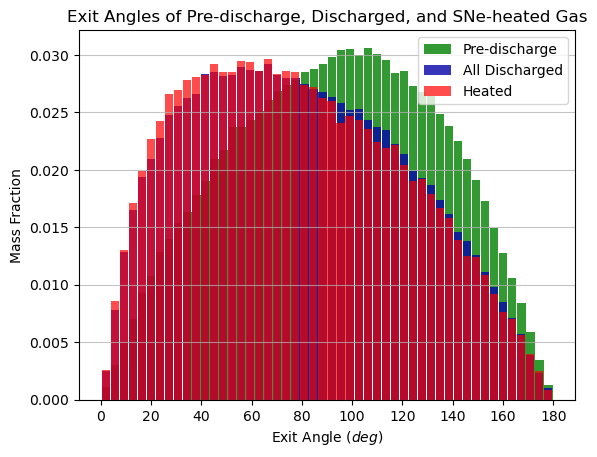

In [12]:
# calculating exit angles.
pre_angle = predischarged.angle
all_angle = discharged.angle
hot_angle = heated.angle

# exit angle histograms for pre-discharged, and discharged, SNe-heated gas.
plt.figure()
plt.hist(pre_angle, bins=50, weights=predischarged.weight, color='green', alpha=0.8, rwidth=0.9, label='Pre-discharge')
plt.hist(all_angle, bins=50, weights=discharged.weight, color='#0504aa', alpha=0.8, rwidth=0.9, label='All Discharged')
plt.hist(hot_angle, bins=50, weights=heated.weight, color='red', alpha=0.7, rwidth=.9, label='Heated')


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Exit Angle ($deg$)')
plt.ylabel('Mass Fraction')
plt.title('Exit Angles of Pre-discharge, Discharged, and SNe-heated Gas')

# leg1 = plt.legend(title='Gas', loc='upper left')
# leg1._legend_box.align = 'right'
# legend(loc=(0.26,0.74))

#plt.xlim(0,16)
#plt.ylim(0,0.085)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)


plt.legend(loc='upper right')
plt.show()

In [14]:
# constructing bins for exit angle histograms.
N = 30
theta1,theta2 = 0,0 # initialize
bins = np.array([theta1]) 
while theta2 < 3.14:
    theta2 = np.arccos(np.cos(theta1)-(2/N))
    bins = np.append(bins,theta2)
    theta1 = theta2

bins = bins*180/np.pi
bincenters = 0.5*(bins[1:]+bins[:-1])

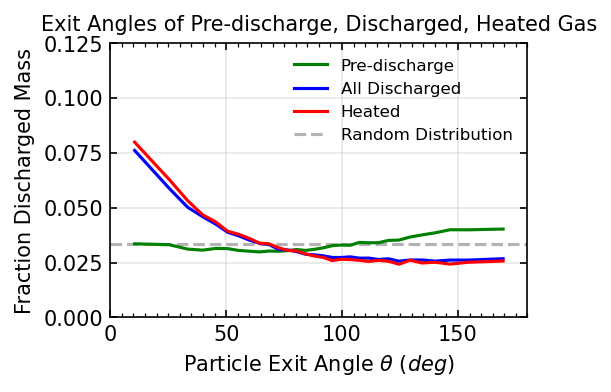

In [15]:
# plotting.
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, bins = np.histogram(predischarged.angle, bins=bins, weights=predischarged.weight)
ax.plot(bincenters, y1, label='Pre-discharge', c='green')

y2, bins = np.histogram(discharged.angle, bins=bins, weights=discharged.weight)
ax.plot(bincenters, y2, label='All Discharged', c='b')

y3, bins = np.histogram(heated.angle, bins=bins, weights=heated.weight)
ax.plot(bincenters, y3, label='Heated', c='r')



# line representing random distribution.
percent = 1/N
ax.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1, label='Random Distribution')

ax.legend(frameon=False, fontsize='8')

# labels, axis scaling, etc.
ax.set_title('Exit Angles of Pre-discharge, Discharged, Heated Gas', fontsize='medium')
ax.set_xlabel(r'Particle Exit Angle $\theta$ ($deg$)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(0,180)
ax.set_ylim(0,0.125)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
#ax.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.3, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

From the above, most glaring is that it all discharged and SNe-heated discharged gas both seem to exit at a near identical distribution of angles from their satellite's bulk. For the whole of discharged gas, however, we observe the expected preference for small angles as a consequence of ram pressure stripping.

We now look at exit angles for different radial distances:

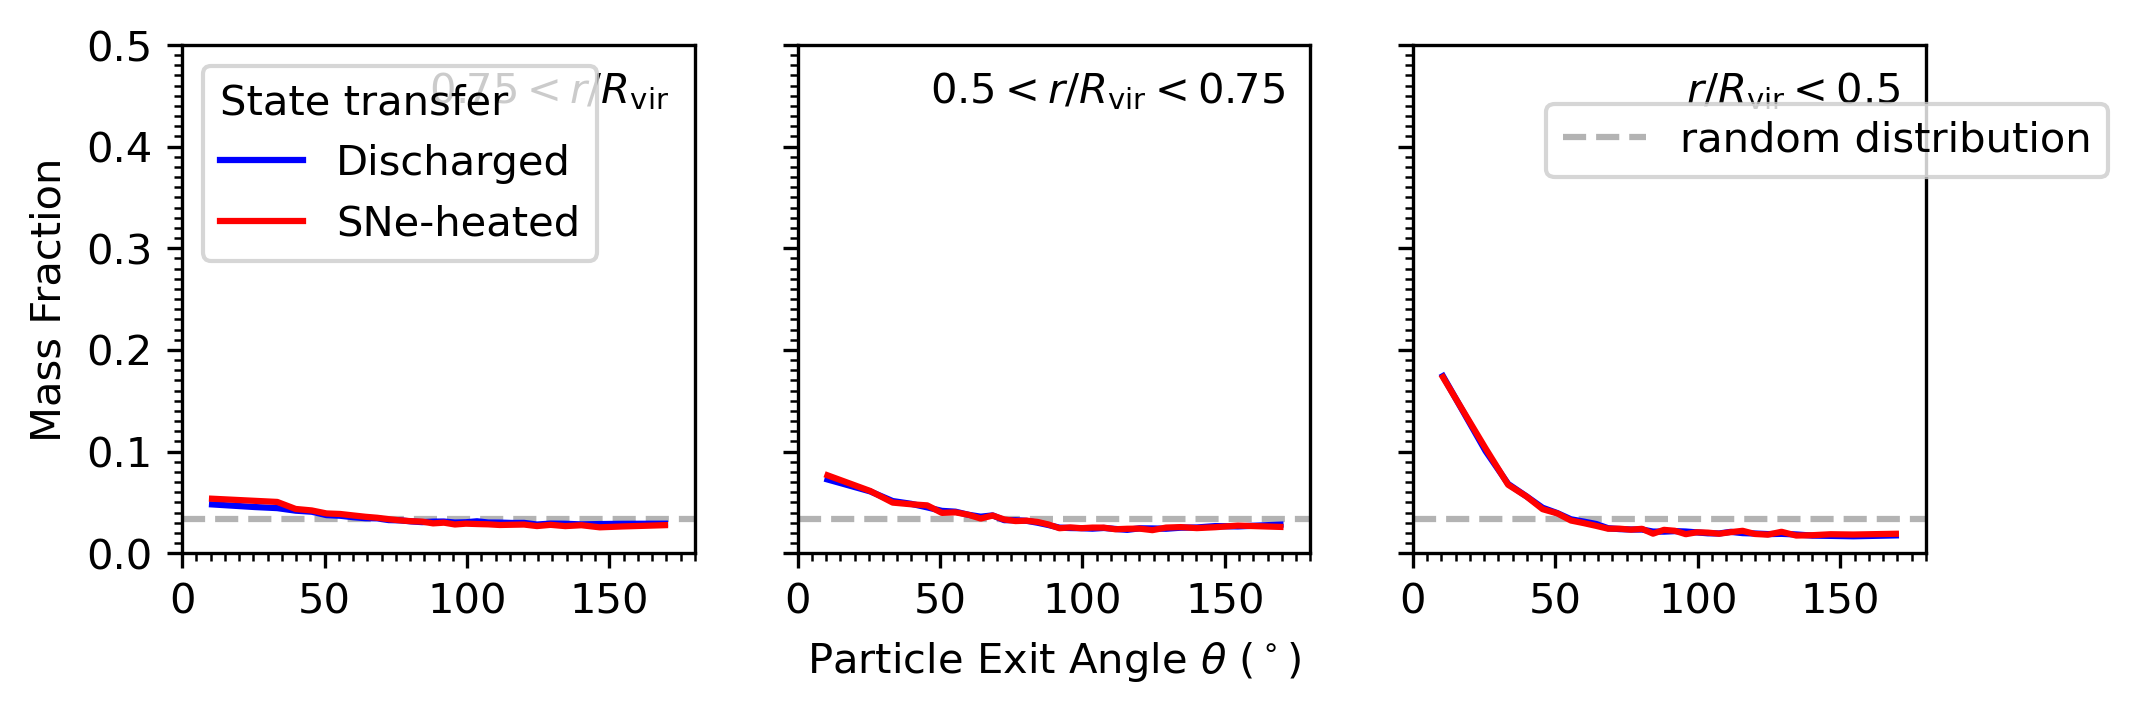

In [18]:
sat_pos = np.array([np.array(discharged.sat_Xc), np.array(discharged.sat_Yc), np.array(discharged.sat_Zc)]).T
host_pos = np.array([np.array(discharged.host_Xc), np.array(discharged.host_Yc), np.array(discharged.host_Zc)]).T
pos_rel = (sat_pos - host_pos) 
pos_mag1 = np.sqrt(pos_rel[:,0]**2 + pos_rel[:,1]**2 + pos_rel[:,2]**2)
pos_mag1 /= np.array(discharged.hostRvir)

sat_pos = np.array([np.array(heated.sat_Xc), np.array(heated.sat_Yc), np.array(heated.sat_Zc)]).T
host_pos = np.array([np.array(heated.host_Xc), np.array(heated.host_Yc), np.array(heated.host_Zc)]).T
pos_rel = (sat_pos - host_pos) 
pos_mag2 = np.sqrt(pos_rel[:,0]**2 + pos_rel[:,1]**2 + pos_rel[:,2]**2)
pos_mag2 /= np.array(heated.hostRvir)

fig,ax = plt.subplots(1,3, dpi=300, figsize=(7.5,2.2), sharey=True)

# leftmost ax will be r > 0.75
ax[0].annotate(r'$0.75 < r/R_{\rm vir}$',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')
cond = pos_mag1 >= 0.75
y1, bins = np.histogram(discharged.angle[cond], bins=bins, weights=discharged.mass[cond]/np.sum\
    (discharged.mass[cond]))
l1 = r'Discharged'
ax[0].plot(bincenters, y1, label=l1, color='b')

cond = pos_mag2 > 0.75
y2, bins = np.histogram(heated.angle[cond], bins=bins, weights=heated.mass[cond]/np.sum(heated.mass[cond]))
l2 = r'SNe-heated'
ax[0].plot(bincenters, y2, label=l2, color='r')


# middle ax will be 0.5 < r < 0.75
ax[1].annotate(r'$0.5 < r/R_{\rm vir} < 0.75$',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')
cond = (pos_mag1 >= 0.5) & (pos_mag1 < 0.75)
y1, bins = np.histogram(discharged.angle[cond], bins=bins, weights=discharged.mass[cond]/np.sum\
    (discharged.mass[cond]))
ax[1].plot(bincenters, y1, color='b')

cond = (pos_mag2 >= 0.5) & (pos_mag2 < 0.75)
y2, bins = np.histogram(heated.angle[cond], bins=bins, weights=heated.mass[cond]/np.sum(heated.mass[cond]))
ax[1].plot(bincenters, y2, color='r')


# rightmost ax will be r < 0.5
ax[2].annotate(r'$r/R_{\rm vir} < 0.5$',(0.95,0.95),xycoords='axes fraction',ha='right',va='top')
cond = pos_mag1 < 0.5
y1, bins = np.histogram(discharged.angle[cond], bins=bins, weights=discharged.mass[cond]/np.sum\
    (discharged.mass[cond]))
ax[2].plot(bincenters, y1, color='b')

cond = pos_mag2 < 0.5
y2, bins = np.histogram(heated.angle[cond], bins=bins, weights=heated.mass[cond]/np.sum(heated.mass[cond]))
ax[2].plot(bincenters, y2, color='r')


# plot the line that represents a random distribution
percent = 1/N
ax[0].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax[1].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax[2].plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1, label='random distribution')

# add legends
leg1 = ax[0].legend(title='State transfer', loc='upper left')
leg1._legend_box.align = 'left'
ax[2].legend(loc=(0.26,0.74))

# labels and ticks and such
ax[1].set_xlabel(r'Particle Exit Angle $\theta$ ($^\circ$)')
ax[0].set_ylabel('Mass Fraction')
for a in ax:
    a.set_xlim(0,180)
    a.set_ylim(0,0.5)

    a.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
    a.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# plt.savefig('plots/theta_allsats_byR.pdf')
plt.show()

No substantial difference brought out between all discharged and SNe-heated discharged when discriminating by $r/R_{vir}$...

In [26]:
ejected, cooled, expelled, accreted_e = read_all_ejected_expelled()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (ejected, cooled, expelled, accreted) for all available satellites <


In [29]:
path = '/home/lonzaric/astro_research/ahdata/ram_pressure.hdf5'
ram_pressure = pd.DataFrame()

with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])

for key in keys:
    d = pd.read_hdf(path, key=key)
    d['key'] = key
    ram_pressure = pd.concat([ram_pressure, d])
    
ram_pressure.head()

OSError: ``/home/lonzaric/astro_research/ahdata`` does not exist

In [28]:
ejected_merged = pd.merge(ejected, ram_pressure, right_on=['key','t'], left_on=['key', 'time'])
expelled_merged = pd.merge(expelled, ram_pressure, right_on=['key','t'], left_on=['key', 'time'])
ejected_merged.head()

P_rest_ej = np.array(ejected_merged.Prest,dtype=float)
P_ram_ej = np.array(ejected_merged.Pram_adv,dtype=float)
P_rest_ex = np.array(expelled_merged.Prest,dtype=float)
P_ram_ex = np.array(expelled_merged.Pram_adv,dtype=float)

ratio_ej = P_ram_ej/P_rest_ej
ratio_ex = P_ram_ex/P_rest_ex

NameError: name 'ram_pressure' is not defined

In [22]:
P_rest_all = np.array(discharged.Prest,dtype=float)
P_ram_all = np.array(discharged.Pram_adv,dtype=float)
P_rest_sne = np.array(heated.Prest,dtype=float)
P_ram_sne = np.array(heated.Pram_adv,dtype=float)

ratio_all = P_ram_all/P_rest_all
ratio_sne = P_ram_sne/P_rest_sne

AttributeError: 'DataFrame' object has no attribute 'Prest'

In [30]:
def plot_panel(N, ax, discharged, heated, label=False):
    theta1,theta2 = 0,0 # initialize
    bins = np.array([theta1]) 
    while theta2 < 3.14:
        theta2 = np.arccos(np.cos(theta1)-(2/N))
        bins = np.append(bins,theta2)
        theta1 = theta2

    bins = bins*180/np.pi
    bincenters = 0.5*(bins[1:]+bins[:-1])
    
    if label:
        labels = ['Heating from disk','Expulsion from disk','Outflow (heating or expulsion) from disk', 'Outflow (expulsion) from halo']
    else:
        labels = [None]*4
    
    e = pd.concat([discharged, heated[heated.state1=='sat_disk']])
    y1, bins = np.histogram(e.angle, bins=bins, weights=e.mass/np.sum(e.mass))
    ax.plot(bincenters, y1, label=labels[2], color='b', zorder=1)
    
    e = discharged
    y1, bins = np.histogram(e.angle, bins=bins, weights=e.mass/np.sum(e.mass))
    ax.plot(bincenters, y1, label=labels[0], color='b', linestyle='--', linewidth=1, zorder=-100, alpha=0.3)
    
    e = heated[heated.state1=='sat_disk']
    y1, bins = np.histogram(e.angle, bins=bins, weights=e.mass/np.sum(e.mass))
    ax.plot(bincenters, y1, label=labels[1], color='b', linestyle='-.', linewidth=1, zorder=-100, alpha=0.3)


    e = heated[heated.state1=='sat_halo']
    y2, bins = np.histogram(e.angle, bins=bins, weights=e.mass/np.sum(e.mass))
    ax.plot(bincenters, y2, label=labels[3], color='r', zorder=100)

AttributeError: 'DataFrame' object has no attribute 'state1'

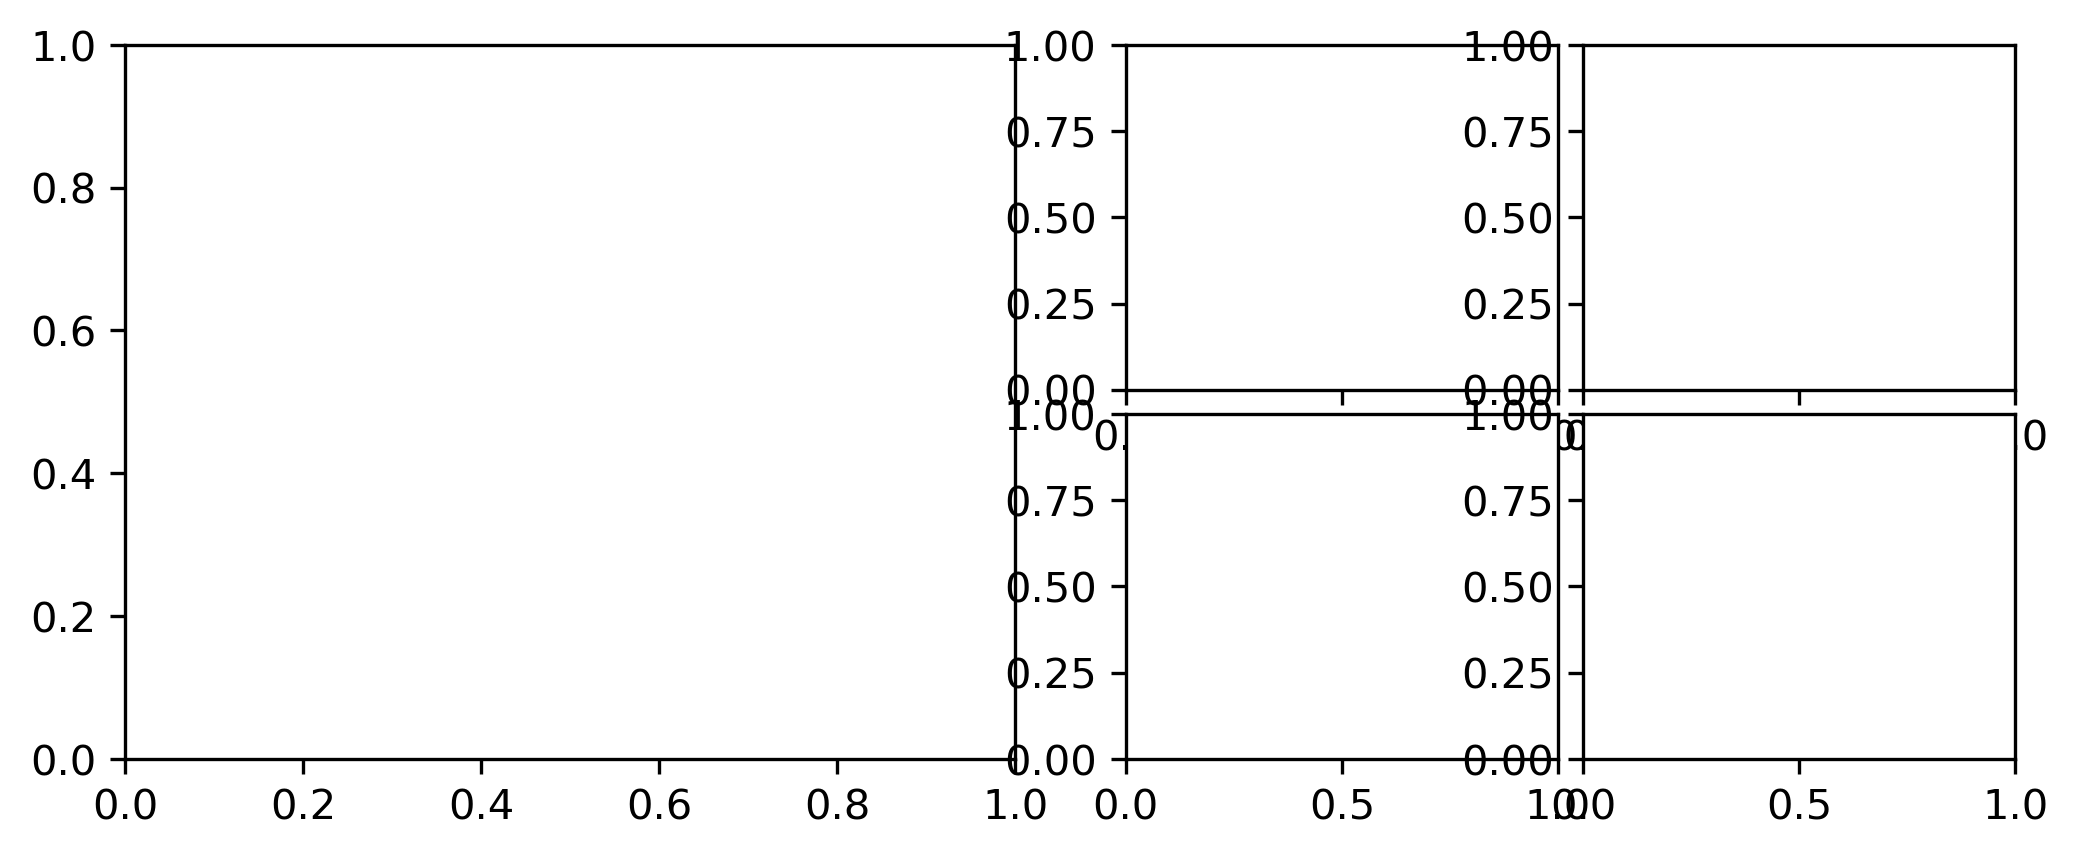

In [31]:
fig = plt.figure(dpi=300, figsize=(7,2.8), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=2, ncols=5, width_ratios = [1,1,0.14,1,1], figure=fig)
gs.update(hspace=0.07, wspace=0.07, top=0.98, right=0.98, left=0.08, bottom=0.13)
ax0 = plt.subplot(gs[:,:2])
ax_buffer = plt.subplot(gs[:,2])
ax1 = plt.subplot(gs[0, 3])
ax2 = plt.subplot(gs[0, 4])
ax3 = plt.subplot(gs[1, 3])
ax4 = plt.subplot(gs[1, 4])

ax_buffer.axis('off')

N = 20

plot_panel(N, ax0, discharged, heated, label=True)
# ax0.annotate(r'All satellites, all timesteps', (0.05,0.95),xycoords='axes fraction',ha='left', va='top')

cond_ej = ratio_ej < 1e-2
cond_ex = ratio_ex < 1e-2 
plot_panel(N, ax1, discharged[cond_ej], heated[cond_ex], label=True)
ax1.annotate(r'$\mathcal{P} < 10^{-2}$', (0.93,0.93),xycoords='axes fraction',ha='right', va='top')
ax1.tick_params(labelbottom=False)

cond_ej = (ratio_ej >= 1e-2) & (ratio_ej < 1e-1)
cond_ex = (ratio_ex >= 1e-2) & (ratio_ex < 1e-1)
plot_panel(N, ax2, discharged[cond_ej], heated[cond_ex])
ax2.annotate(r'$10^{-2} \leq \mathcal{P} < 10^{-1}$',(0.93,0.93),xycoords='axes fraction',ha='right', va='top')
ax2.tick_params(labelleft=False, labelbottom=False)

cond_ej = (ratio_ej >= 1e-1) & (ratio_ej < 1)
cond_ex = (ratio_ex >= 1e-1) & (ratio_ex < 1)
plot_panel(N, ax3, discharged[cond_ej], heated[cond_ex])
ax3.annotate(r'$10^{-1} \leq \mathcal{P} < 1$',(0.93,0.93),xycoords='axes fraction',ha='right', va='top')

cond_ej = ratio_ej >= 1
cond_ex = ratio_ex >= 1
plot_panel(N, ax4, discharged[cond_ej], heated[cond_ex])
ax4.annotate(r'$\mathcal{P} \geq 1$',(0.93,0.93),xycoords='axes fraction',ha='right', va='top')
ax4.tick_params(labelleft=False)


# plot the line that represents a random distribution
percent = 1/N
ax0.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1, label='random distribution')
ax1.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax2.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax3.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)
ax4.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)

# add legends
leg = ax0.legend(frameon=False, loc='upper right')
vp = leg._legend_box._children[-1]._children[0]
for c in vp._children:
    c._children.reverse()
vp.align="right" 


# labels and ticks and such
ax0.set_xlabel('.', color=(0, 0, 0, 0))
ax0.set_ylabel('Mass Fraction')
fig.text(0.53, 0.03, r'Particle Exit Angle $\theta$ ($^\circ$)', ha='center', va='center')

for a in [ax0,ax1,ax2,ax3,ax4]:
    a.set_xlim(0,180)
    a.set_ylim(0,0.5)

    a.xaxis.set_major_locator(mpl.ticker.MultipleLocator(60))
    a.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
    a.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
    a.tick_params(direction='in',which='both',right=True,top=True)
    
ax4.set_xticklabels([None, None, 60, 120, 180])
ax0.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax0.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))
ax0.set_ylim(0, 0.35)

plt.savefig('plots/theta.pdf')
plt.show()

### Comparing Temperature <a class="anchor" id="comptemperature"></a>

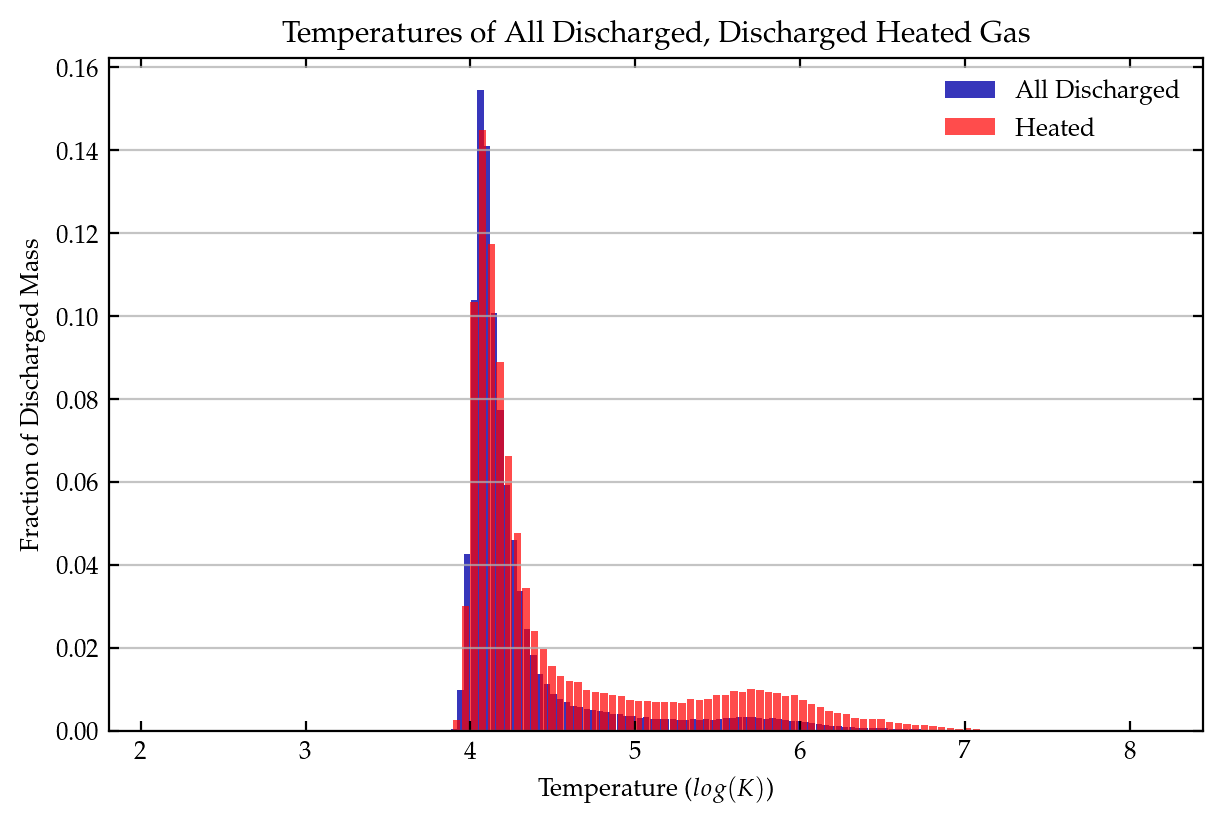

In [15]:
# calling logorithmic temperatures for pre-discharge, hot pre-discharge, discharged, and hot discharged gas.
pre_temp = np.log10(predischarged.temp)
hot_pre_temp = np.log10(hot_predischarged.temp)
all_temp = np.log10(discharged.temp)
hot_temp = np.log10(heated.temp)


# exit angle histograms for all discharged and hot discharged gas.
plt.figure()
plt.hist(all_temp, bins=150, weights=discharged.weight, color='#0504aa', alpha=0.8, rwidth=0.95, label='All Discharged')
plt.hist(hot_temp, bins=100, weights=heated.weight, color='red', alpha=0.7, rwidth=.85, label='Heated')


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperature ($log(K)$)')
plt.ylabel('Fraction of Discharged Mass')
plt.title('Temperatures of All Discharged, Discharged Heated Gas')

# leg1 = plt.legend(title='Gas', loc='upper left')
# leg1._legend_box.align = 'right'
# legend(loc=(0.26,0.74))

# plt.xlim(7,13)
# plt.ylim(0,0.055)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)


plt.legend(loc='upper right')
plt.show()

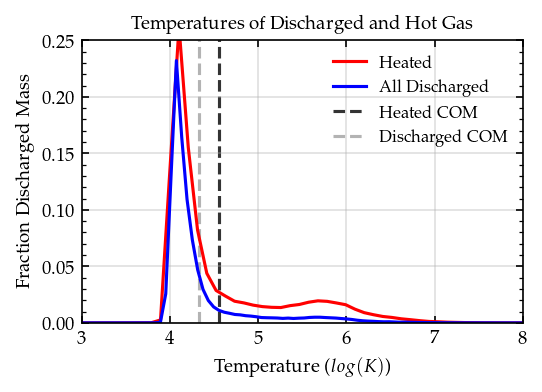

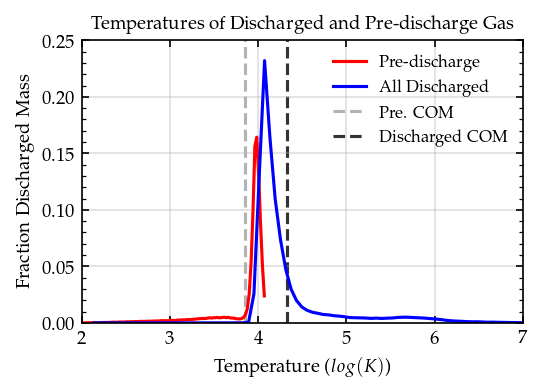

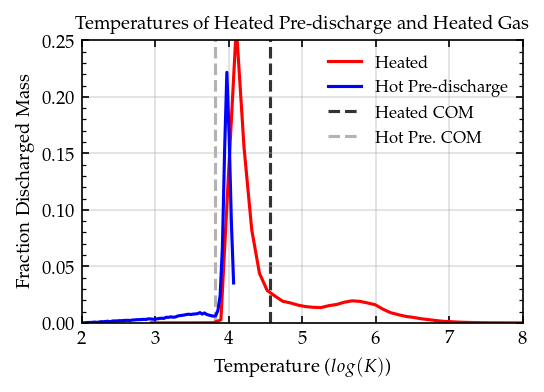

In [16]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_temp, bins=50, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_temp, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = hot_temp.mean()
com2 = all_temp.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Temperatures of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Temperature ($log(K)$)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(3,8)
ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_temp, bins=100, weights=predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_temp, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = pre_temp.mean()
com2 = all_temp.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Temperatures of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Temperature ($log(K)$)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(2,7)
ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_temp, bins=50, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(hot_pre_temp, bins=70, weights=hot_predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# plot mean position of mass.
com1 = hot_temp.mean()
com2 = hot_pre_temp.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Hot Pre. COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Temperatures of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Temperature ($log(K)$)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(2,8)
ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

### Code Testing <a class="anchor" id="proving"></a>

Testing out differnt data types and computations.

In [12]:
# picking out those gas particles that were subject to supernova heating.
cond = discharged.coolontime > discharged.time
hot_discharged = discharged[cond]

cond = predischarged.coolontime > predischarged.time
hot_predischarged = predischarged[cond]

hot_discharged[['coolontime', 'time']];

# displaying data for discharged gas.
# display(hot_ejected[['coolontime', 'time']], hot_expelled[['coolontime', 'time']])

print('Mass of expelled: ',np.sum(expelled['mass'])/1e7)
print('Mass of SNe heated expelled: ',np.sum(hot_expelled['mass'])/1e7)
print('Mass fraction of expelled heated by SN: ', np.sum(hot_expelled['mass'])/np.sum(expelled['mass']), '\n')

print('Mass of ejected: ',np.sum(ejected['mass'])/1e7)
print('Mass of SNe heated ejected: ',np.sum(hot_ejected['mass'])/1e7)
print('Mass fraction of ejected heated by SN: ', np.sum(hot_ejected['mass'])/np.sum(ejected['mass']), '\n')

print('Mass of discharged: ',np.sum(discharged['mass'])/1e7)
print('Mass of SNe heated discharged: ',np.sum(hot_discharged['mass'])/1e7)
print('Mass fraction of discharged heated by SN: ', np.sum(hot_discharged['mass'])/np.sum(discharged['mass']))

NameError: name 'expelled' is not defined

In [ ]:
# making plots comparing heated/discharged gas and predischarged/discharged gas radial positions.
bins = 100
fig, ax = plt.subplots(1,3, dpi=300, figsize=(8.5,2.2), sharey=True)


y1, bins = np.histogram(all_temp, bins=bins, weights=discharged.weight)
l1 = r'All Discharged'
ax[0].plot(bins[1:], y1, label=l1, color='b')

y2, bins = np.histogram(hot_temp, bins=bins, weights=heated.weight)
l2 = r'Heated'
ax[0].plot(bins[1:], y2, label=l2, color='r')



y1, bins = np.histogram(all_temp, bins=bins, weights=discharged.weight)
l1 = r'All Discharged'
ax[1].plot(bins[1:], y1, label=l1, color='b')

y2, bins = np.histogram(pre_temp, bins=bins, weights=predischarged.weight)
l2 = r'All Pre-discharge'
ax[1].plot(bins[1:], y2, label=l2, color='cadetblue')



y1, bins = np.histogram(hot_pre_temp, bins=bins, weights=hot_predischarged.weight)
l1 = r'Heated Pre-discharge'
ax[2].plot(bins[1:], y1, label=l1, color='darkcyan')

y2, bins = np.histogram(hot_temp, bins=bins, weights=heated.weight)
l2 = r'Heated'
ax[2].plot(bins[1:], y2, label=l2, color='r')


# titles, legends, and ticks.
ax[0].set_title(r'Discharged vs. Heated')
ax[1].set_title(r'Discharged vs. Pre-discharge')
ax[2].set_title(r'Pre-discharge vs. Heated')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')
ax[2].legend(fontsize='small')


ax[1].set_xlabel(r'Radial Velocity Relative to Sat. Center $(km/h)$')
ax[0].set_ylabel('Fraction Discharged Mass')


for a in ax:
    a.set_xlim(2,7)
    #a.set_ylim(0,1)
    
    a.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
    a.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))

    
    
# plt.savefig('plots/comparison_radvel.pdf')
plt.show()